In [1]:
import h2o

In [2]:
h2o.init(max_mem_size="4G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\narendran.thesma\AppData\Local\Temp\tmp7ol7f1r_
  JVM stdout: C:\Users\narendran.thesma\AppData\Local\Temp\tmp7ol7f1r_\h2o_narendran_thesma_started_from_python.out
  JVM stderr: C:\Users\narendran.thesma\AppData\Local\Temp\tmp7ol7f1r_\h2o_narendran_thesma_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,5 months and 13 days !!!
H2O cluster name:,H2O_from_python_narendran_thesma_k9vob8
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file("output_merged_25oct.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
from h2o.estimators import H2ORandomForestEstimator

In [5]:
data.head()

COMPANY,COUNTRY,DISTRIBUTOR,ARTICLE ID,MODEL NUMBER,ARTICLE NAME,SUBBRAND,SPORTS CATEGORY,PRODUCT DIVISION,PRODUCT GROUP,PRODUCT TYPE,FRANCHISE,TECHNOLOGIES,COLOUR GROUP,COLOUR,GENDER,AGE GROUP,CONSUMER RATING,INITIAL PRICE IN LOCAL CURRENCY,CURRENT PRICE IN LOCAL CURRENCY,LOCAL CURRENCY,INITIAL PRICE IN EUR,CURRENT PRICE IN EUR,INITIAL PRICE IN SELECTED CURRENCY,CURRENT PRICE IN SELECTED CURRENCY,SELECTED CURRENCY,PRODUCT INTRODUCTION DATE,DISCOUNTED SINCE,PRODUCT EXIT DATE,PRODUCT DESCRIPTION,PRODUCT URL,IMAGE-SERVER URL
Nike,USA,Own eCom,837786-603,837786,KD 8 'Aunt Pearl' Premium Big Kids' Basketball Shoe,Performance,Basketball,Footwear,Performance Footwear,Basketball,KD,Flywire|Nike Zoom,pink,Vivid Pink/Hyper Turquoise/Pink Blast/Black,Unisex,Youth,5,140,64.97,USD,121.8,56.5239,121.8,56.5239,EUR,2016-02-29 00:00:00,2016-11-09 00:00:00,2017-09-18 00:00:00,"DYNAMIC VERSATILITY. INSPIRED STYLE.; The KD 8 'Aunt Pearl' Premium Big Kids' Basketball Shoe is a triple threat of breathability, support and flexibility. Colorful details pay tribute to Kevin Durant's personal hero.; Responsive Cushioning; The Nike Zoom Air unit offers low-profile responsiveness with added flexibility and bounce.; Dynamic Lockdown; Ultralight Flywire cables integrate with the laces to support your foot during quick moves.; More Details; Woven mesh upper for ultralight, flexible support; Durable rubber outsole offers traction and flexibility",https://store.nike.com/us/en_us/pd/kd-8-aunt-pearl-premium-35y-7y-big-kids-basketball-shoe/pid-10972606/pgid-11796274,http://usporamap287.am.adsint.biz/zoomimages/1691441/1691441_400.jpg
Nike,USA,Own eCom,810455-421,810455,LeBron 13 Transportation Kids' Adjustable Hat,Sport Inspired,Lifestyle,Accessories,Headwear,Caps,No Franchise,,blue,Loyal Blue/White/Omega Blue,Unisex,Youth,0,28,19.97,USD,24.36,17.3739,24.36,17.3739,EUR,2016-02-29 00:00:00,2016-04-04 00:00:00,2016-05-02 00:00:00,LEBRON TRANSPORTATION HAT The LeBron 13 Transportation Kids' Adjustable HatÂ is made with a vibrant logo and printed upperbill for a bold display of player pride. Benefits Six-panel design with interior taping for comfort and durability Embroidered eyelets for breathability Snap back closure for a customized fit Product Details Fabric: Body: 100% polyester. Underbill: 100% cotton Hand wash Imported,http://store.nike.com/us/en_us/pd/lebron-13-transportation-adjustable-hat/pid-10867580/pgid-11288953,http://usporamap287.am.adsint.biz/zoomimages/1691420/1691420_400.jpg
Nike,USA,Own eCom,807940-010,807940,Nike SB Cherry Blossom Perforated Trucker Hat,Sport Inspired,Skate,Accessories,Headwear,Caps,No Franchise,,black,Black,Unisex,Adult,0,32,32,USD,27.84,27.84,27.84,27.84,EUR,2016-02-29 00:00:00,,2016-03-21 00:00:00,"BREATHABLE COMFORT The Nike SB Cherry Blossom Perforated Trucker Hat features breathable panels and a vintage flat-brim profile for ventilated comfort and a classic look. Benefits Perforated panels for breathability Structured, flat-brim profile offers a classic look Snaps in back give you adjustable comfort Product Details Fabric: 100% polyester Hand wash Imported",http://store.nike.com/us/en_us/pd/sb-cherry-blossom-perforated-trucker-hat/pid-10866681/pgid-10966896,http://usporamap287.am.adsint.biz/zoomimages/1672056/1672056_400.jpg
Nike,USA,Own eCom,749502-100,749502,Nike Cortez Big Kids' Shoe,Sport Inspired,Lifestyle,Footwear,Sport Inspired Footwear,Kids Shoes (unisex),Cortez,Phylon,white,White/Wolf Grey/White,Unisex,Youth,5,60,44.97,USD,52.2,39.1239,52.2,39.1239,EUR,2016-02-29 00:00:00,2017-02-09 00:00:00,2017-04-10 00:00:00,"A CLASSIC, REBORN. The Nike Cortez BigÂ Kids' ShoeÂ is made with a supportive upper and the lightweight cushioning that made the original a running icon. Benefits Synthetic leatherÂ upper for support and durability Full-length Phylon midsole for lightweight cushioning Rubber outsole with herringbone pattern for traction and durability Cortez Origins The Nike Cortez was Bill Bowerman's first masterpiece, bu

In [7]:
predictors = ["COMPANY", "COUNTRY", "ARTICLE NAME", "FRANCHISE", "CONSUMER RATING"]
response = "SUBBRAND"

In [8]:
rf_baseline = H2ORandomForestEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                            stopping_rounds = 5, score_tree_interval = 10,
                                            model_id = "rf_baseline.hex"
                                           )
rf_baseline.train(x = predictors, y = response, 
                   training_frame = data
                  )

drf Model Build progress: |███████████████████████████████████████████████| 100%


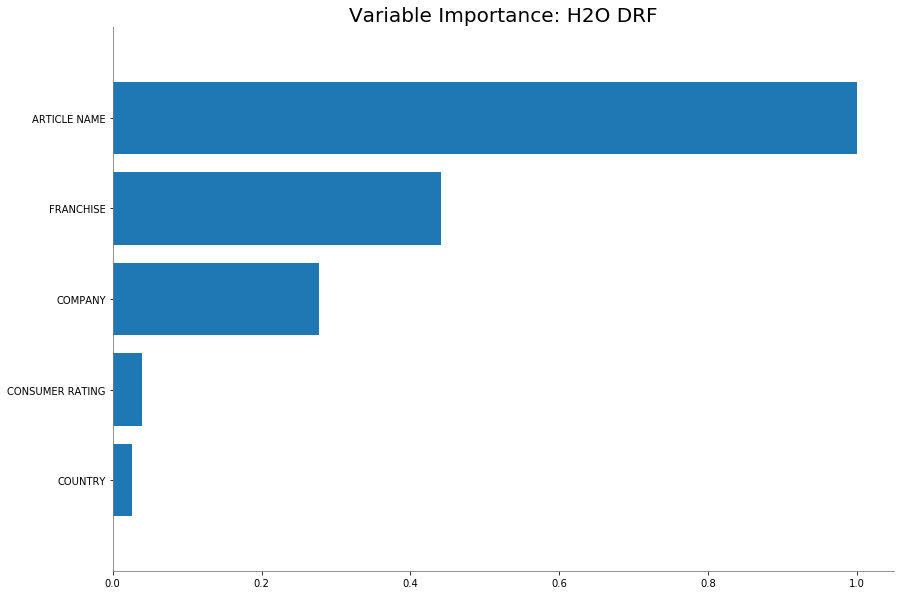

In [10]:
rf_baseline.varimp_plot()

In [11]:
rf_baseline.varimp()

[('ARTICLE NAME', 834993.4375, 1.0, 0.5608957421112097),
 ('FRANCHISE', 368753.65625, 0.44162461606172804, 0.24770536676052102),
 ('COMPANY', 231089.328125, 0.27675586147945025, 0.1552311843081434),
 ('CONSUMER RATING', 32577.51953125, 0.03901530008282251, 0.02188351569364627),
 ('COUNTRY', 21264.568359375, 0.02546674908373157, 0.01428419112647959)]